Welcome to your next checkpoint on the Synapse road!
Today we’re diving into the Video Game Sales dataset to practice real-world data preprocessing + EDA. Think of this like prepping ingredients before cooking — we’ll clean, slice, and plate the data so insights pop 🍽️

We’ll be using pandas, numpy, matplotlib, and seaborn for this task.
Run the following cell to import them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Alright, now that we’ve got our tools ready, let’s bring in the star of the show — the **Video Game Sales dataset** 🎮  

Your task:  
- Load the dataset into a pandas DataFrame.  
- Take a quick peek at the first few rows using.  
- Check the shape of the dataset to see how big this universe is.  

Think of this step as unboxing a new console — gotta see what’s inside first!  


In [2]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

### 🕹️ Level 1: Meet the Characters  

Now that we’ve unboxed our dataset, let’s get to know the **cast of characters**:  
- What kinds of columns do we have? (numeric, object, etc.)  
- How many missing values are there?  

Your task:  
- To get a quick overview of column types + null values.  
- To double-check the data types.  

This step is like reading the **character bios** before starting a game   


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### 🎯 Level 2: Quick Stats Check (Describe the Data)  

Every good gamer checks the **stats screen** before playing  
Now, let’s do the same for our dataset:  

Your task:  
- To get summary statistics for numerical columns.  
- Notice things like average sales, max values, and distribution hints.  

This is like peeking at the **scoreboard** — who’s leading, what’s the high score?   


In [7]:
df[['Rank','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 🧹 Level 3: Clean the Map (Missing Values)

Time to sweep the floor before we play.

**Your tasks:**
- Check how many missing values are in each column.
- For this dataset, handle missing values in **`Year`** and **`Publisher`** by removing those rows.
- Re-check to confirm there are **no missing values left**.

> Tip: Do a quick sanity check after cleaning (row count should drop a bit).


In [8]:
df.isna().sum()
df = df.dropna()

In [9]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## 🔢 Level 4: Patch the `Year` Column (Data Types)

`Year` often shows up as a float (e.g., `2008.0`) because of missing values earlier.

**Your tasks:**
- Convert **`Year`** to **integer**.
- Re-run a quick `info` to confirm the dtype change.

> If conversion fails, revisit Level 3 — some NaNs may still be lurking.


In [10]:
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB



## 🎮 Level 5: Spotting the Legends  
Now that we’ve explored platforms and genres, let’s look at the **all-time best sellers**.  
Your task:  

List the **Top 5 best-selling video games**.  
We’ll display their **Name, Platform, Genre, and Global Sales**.  

Think of this as the **Hall of Fame of Video Games** 




In [11]:
df[df["Rank"]<=5][["Name","Platform", "Genre", "Global_Sales"]]

,Name,Platform,Genre,Global_Sales
0,Wii Sports,Wii,Sports,82.74
1,Super Mario Bros.,NES,Platform,40.24
2,Mario Kart Wii,Wii,Racing,35.82
3,Wii Sports Resort,Wii,Sports,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37



## 🎮 Level 6: Which Console Ruled the Game?  
Every console/platform has a legacy — but which one released the **most number of games**?  

Count the number of games released on each platform.  
Create a **bar chart** to visualize it.  
Finally, answer: **Which platform has the highest number of releases?** 

  


In [12]:
game_count = df.groupby("Platform")["Name"].count().sort_values().reset_index().rename(columns={"Name":"Count"})
game_count.sort_values("Count", ascending=False)

,Platform,Count
30,DS,2131
29,PS2,2127
28,PS3,1304
27,Wii,1290
26,X360,1234
25,PSP,1197
24,PS,1189
23,PC,938
22,XB,803
21,GBA,786


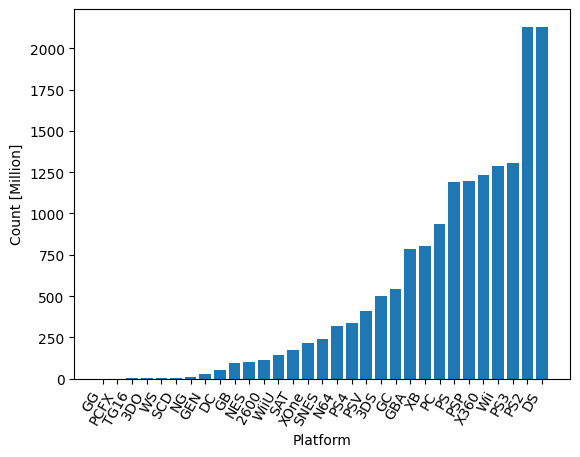

In [13]:
plt.figure()
plt.bar(game_count['Platform'],game_count['Count'])
plt.ylabel("Count [Million]")
plt.xlabel("Platform")
plt.xticks(rotation=60, ha='right') 
plt.show()

In [14]:
print(f"Top Platform (By Game Releases): {game_count.iloc[-1,0]} \nGame Count: {game_count.iloc[-1,1]}")

Top Platform (By Game Releases): DS 
Game Count: 2131



## 🏢 Level 7: The Big Bosses (Top Publishers)  
Some publishers dominate the industry like final bosses 

Your task:  
- Find the **Top 5 publishers** with the highest **total Global Sales**.  
- Show their contribution using a **pie chart** 

This will help us see who really controlled the gaming world  


In [15]:
top_publisher = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).reset_index()
top_publisher.head(5)

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54


In [16]:
top_5_publisher = top_publisher.head(5)
top_5_publisher

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54


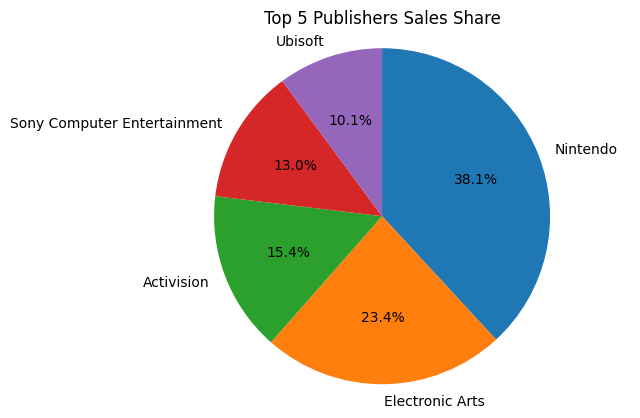

In [17]:
plt.figure()
plt.pie(top_5_publisher["Global_Sales"], labels=top_5_publisher["Publisher"], autopct="%1.1f%%", startangle=90, counterclock=False)
plt.axis("equal")
plt.title("Top 5 Publishers Sales Share")
plt.show()


## 🌍 Level 8: Genre Champions in Europe  
Different genres have their own kings in different regions.  
Let’s focus on **Europe (EU Sales)** for now.  

Your task:  
- For **each Genre**, find the **Publisher** that has the highest **total EU Sales**.  
- Print the results as a list (Genre → Top Publisher).  

Think of this as awarding the **regional championship belts**  



In [18]:
df[["Genre","Publisher","EU_Sales"]].sort_values("EU_Sales", ascending = False).groupby("Genre", group_keys=False).head(1).set_index("Genre")

,Publisher,EU_Sales
Genre,,
Sports,Nintendo,29.02
Racing,Nintendo,12.88
Simulation,Nintendo,11.00
Action,Take-Two Interactive,9.27
Misc,Nintendo,9.26
Platform,Nintendo,9.23
Role-Playing,Nintendo,8.89
Shooter,Activision,5.88
Puzzle,Nintendo,5.36



## 🎯 Level 9: Nintendo’s Golden Year  
Nintendo is one of the biggest names in gaming 🎮  
But… which year did Nintendo achieve its **highest total Global Sales**?  

Your task:  
- Filter the dataset for **Publisher = Nintendo**.  
- Group sales by year.  
- Find the year with the **highest global sales**.  

This is like uncovering the **peak of Nintendo’s power**   



In [19]:
Nintendo_df = df[df["Publisher"].eq("Nintendo")]

In [20]:
Nintendo_df.groupby("Year")["Global_Sales"].sum().reset_index().sort_values("Global_Sales",ascending=False).iloc[0]

Year            2006.00
Global_Sales     205.61
Name: 23, dtype: float64


## 🏟️ Final Boss Arena: The Data Playground  

You’ve fought through all the levels ⚔️, now it’s time to explore on your own 🎉  

Your final mission:  
- Choose **any 2–3 plots** (your choice!) that show **interesting patterns** in the data.   

💡 This is your **creative zone** → Think of it as building your own “story” from the dataset.  

When you’re done, share your best plot with the team — let’s see who finds the coolest insight!  



In [21]:
Yearly_sales = df.groupby("Year")["Global_Sales"].sum().reset_index()
Yearly_Games = df.groupby("Year")["Name"].count().reset_index()

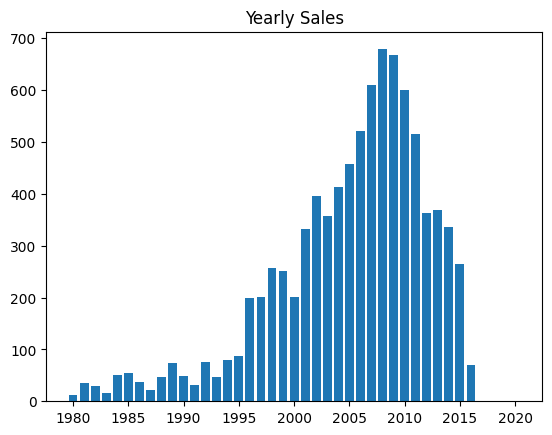

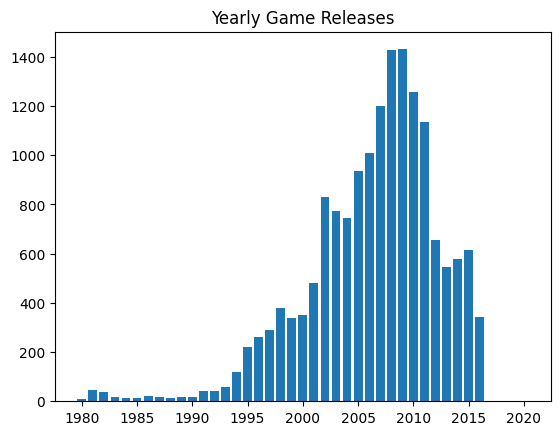

In [22]:
plt.figure()
plt.bar(Yearly_sales["Year"],Yearly_sales["Global_Sales"])
plt.title("Yearly Sales")
plt.figure()
plt.bar(Yearly_Games["Year"],Yearly_Games["Name"])
plt.title("Yearly Game Releases")
plt.show()

This shows that Global Sales as well as the count of Games released were on a steady rise from 1980s to 2009 after which they have consistently been in a decline \nAlso the data after 2016 doesn't seem to be accurate since the fall is too steep which is why its correctness may need to be checked for

In [23]:
Yearly_Games[Yearly_Games["Year"]>=2016]

,Year,Name
36,2016,342
37,2017,3
38,2020,1


In [24]:
Yearly_sales[Yearly_sales["Year"]>=2016]

,Year,Global_Sales
36,2016,70.90
37,2017,0.05
38,2020,0.29


In [25]:
df_1 = Yearly_sales.copy()
df_1["Ratio"] = Yearly_sales["Global_Sales"]/Yearly_Games["Name"]
df_1 = df_1[["Year","Ratio"]]

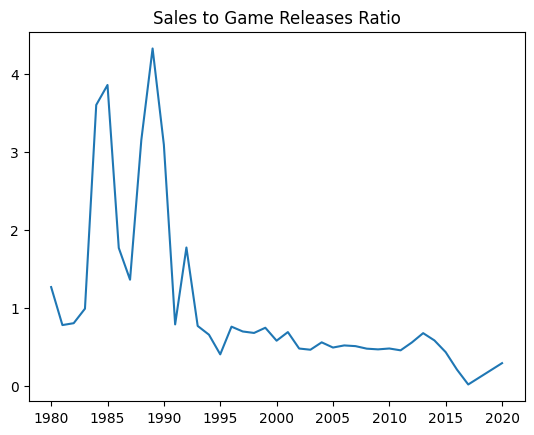

In [26]:
plt.figure()
plt.plot(df_1["Year"],df_1["Ratio"])
plt.title("Sales to Game Releases Ratio")
plt.show()

This Chart shows that the ratio of Sales to Releases of Games was very volatile between 1980s - 1995s however after that it was slowly getting smaller from 1 hence showing that the sales of games was going down per game released 

In [27]:
platform_sales_yearly = df.groupby(["Platform","Year"])["Global_Sales"].sum().reset_index()

In [28]:
platform_sales_yearly

,Platform,Year,Global_Sales
0,2600,1980,11.38
1,2600,1981,35.77
2,2600,1982,28.86
3,2600,1983,5.83
4,2600,1984,0.27
...,...,...,...
236,XB,2008,0.18
237,XOne,2013,18.60
238,XOne,2014,52.43
239,XOne,2015,57.66


In [29]:
top_platform = df.groupby("Platform")["Name"].count().reset_index().sort_values("Name",ascending=False).head(5)
top_platform

,Platform,Name
4,DS,2131
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1234


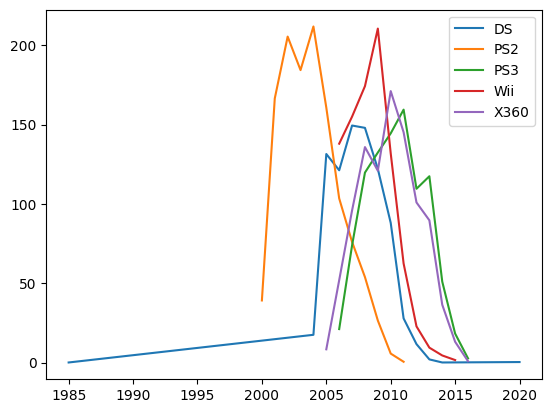

In [30]:
for platform in platform_sales_yearly["Platform"].unique():
    if platform in top_platform["Platform"].values:
        subset = platform_sales_yearly[platform_sales_yearly["Platform"]==platform]
        plt.plot(subset["Year"],subset["Global_Sales"], label=platform)
    
plt.legend()
plt.show()

Intent was to find the duration of a platforms popularity however this view shows inconclusive results